# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#import dataset
df = pd.read_csv("hasil_cluster.csv")
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,cluster
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,1
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,3
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,1
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,3
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# data splitting data pelatihan dan data pengujian
x = df.drop(columns='cluster')
y = df['cluster']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# menampilkan bentuk pelatihannya
print(f"Training set shape: x_train={x_train.shape}, y_train={y_train.shape}")

print(f"Test set shape: x_test={x_test.shape}, y_test={y_test.shape}")

Training set shape: x_train=(5640, 6), y_train=(5640,)
Test set shape: x_test=(1410, 6), y_test=(1410,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
#Model
nb = GaussianNB().fit(x_train, y_train)
lr = LogisticRegression().fit(x_train, y_train)
dt = DecisionTreeClassifier().fit(x_train, y_train)
rf = RandomForestClassifier().fit(x_train, y_train)
print("Model training selesai.")

Model training selesai.


Disini saya menggunakan metode untuk klasifikasi dengan beberapa diantaranya adalah gausian (naive bayes), logistic regression, decision tree dan random forest. setelah akan dilakukan percobaan untuk mendapatkan nilai yang paling tertinggi yang digunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== Naive Bayes ====
Confusion Matrix:
Accuracy: 0.9766
Precision: 0.9840
Recall: 0.9766
F1-Score: 0.9786

----------------------------------------



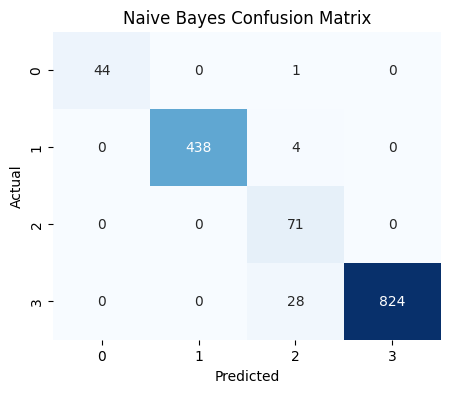

In [6]:
# Model
# Naive Bayes (Gaussian)
y_pred_nb = nb.predict(x_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Tampilkan confusion matrix secara keseluruhan
print("==== Naive Bayes ====")
print("Confusion Matrix:")

# Tampilkan metrik untuk multi-kelas
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model training selesai.
==== Logistic Regression ====
Confusion Matrix:
Accuracy: 0.9972
Precision: 0.9972
Recall: 0.9972
F1-Score: 0.9971

----------------------------------------



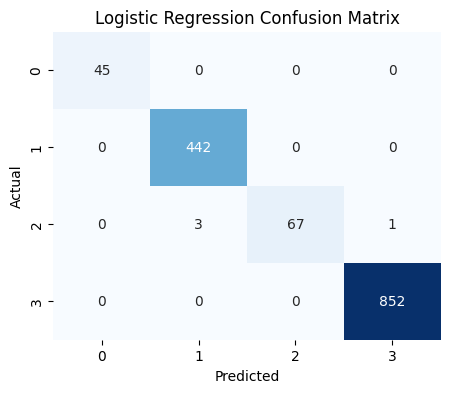

In [7]:
# Model Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)

print("Model training selesai.")

# Prediksi menggunakan Logistic Regression
y_pred_lr = lr.predict(x_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Tampilkan confusion matrix secara keseluruhan
print("==== Logistic Regression ====")
print("Confusion Matrix:")

# Tampilkan metrik untuk multi-kelas
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree ====
Confusion Matrix:
Accuracy: 0.9993
Precision: 0.9993
Recall: 0.9993
F1-Score: 0.9993

----------------------------------------



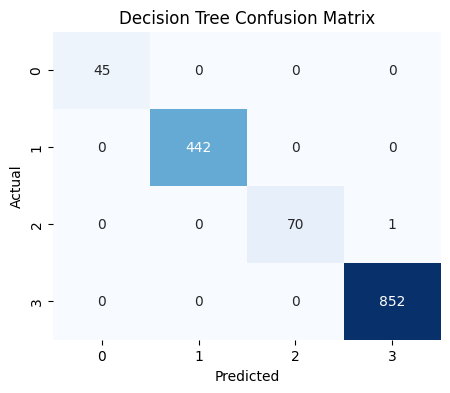

In [8]:
# Decision Tree
y_pred_nb = dt.predict(x_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Tampilkan confusion matrix secara keseluruhan
print("==== Decision Tree ====")
print("Confusion Matrix:")

# Tampilkan metrik untuk multi-kelas
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest ====
Confusion Matrix:
Accuracy: 0.9986
Precision: 0.9986
Recall: 0.9986
F1-Score: 0.9986

----------------------------------------



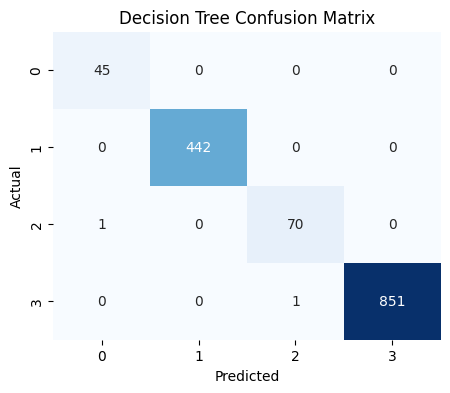

In [9]:
# Random Forest
y_pred_nb = rf.predict(x_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Tampilkan random forest secara keseluruhan
print("==== Random Forest ====")
print("Confusion Matrix:")

# Tampilkan metrik untuk multi-kelas
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Metrik evaluasi untuk multi-kelas
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Evaluate each model and collect results
results = {
    'Naive Bayes': evaluate_model(nb, x_test, y_test),
    'Logistic Regression': evaluate_model(lr, x_test, y_test),
    'Decision Tree': evaluate_model(dt, x_test, y_test),
    'Random Forest': evaluate_model(rf, x_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.976596   0.984022  0.976596  0.978626
1  Logistic Regression  0.997163   0.997178  0.997163  0.997126
2        Decision Tree  0.999291   0.999292  0.999291  0.999288
3        Random Forest  0.998582   0.998597  0.998582  0.998585


metode yang digunakan gausian (naive bayes), logistic regression, decision tree dan random forest. nilai evaluasi paling baik akan digunakan.
Hasil nilai dari hasil percobaan metode itu yang paling baik adalah Random Forest dengan hasil yang sangat baikk.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
# TIDAK ADA (-)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [12]:
# TIDAK ADA (-)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [13]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Metrik evaluasi untuk multi-kelas
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Assume you have trained models: nb, lr, dt, rf

# Evaluate each model and collect results
results = {
    'Naive Bayes': evaluate_model(nb, x_test, y_test),
    'Logistic Regression': evaluate_model(lr, x_test, y_test),
    'Decision Tree': evaluate_model(dt, x_test, y_test),
    'Random Forest': evaluate_model(rf, x_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy']*100,
        'Precision': metrics['Precision']*100,
        'Recall': metrics['Recall']*100,
        'F1-Score': metrics['F1-Score']*100
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)
summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].applymap(lambda x: f"{x:.2f}%")

# Display the summary DataFrame
print(summary_df)

                 Model Accuracy Precision  Recall F1-Score
0          Naive Bayes   97.66%    98.40%  97.66%   97.86%
1  Logistic Regression   99.72%    99.72%  99.72%   99.71%
2        Decision Tree   99.93%    99.93%  99.93%   99.93%
3        Random Forest   99.86%    99.86%  99.86%   99.86%


C:\Users\User\AppData\Local\Temp\ipykernel_15700\1204287861.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].applymap(lambda x: f"{x:.2f}%")


Hasil diatas tidak melalui proses tuning karena hasil sudah cukup sangat baik dalam proses klasifikasi. dan yang paling terbaik adalah dengan metode Random Forest akurasi 99.86%    precision 99.86%  recall 99.86%    dan F1-score 99.86%